In [1]:
import os
import io

import IPython.display
import base64
from PIL import Image
import sys

sys.path.append("../")

from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())  # read local .env file
from alchemy import AlchemyAPI

hf_api_key = os.environ["HF_API_KEY"]

In [2]:
# MODEL = "runwayml/stable-diffusion-v1-5"
MODEL = "ehristoforu/dalle-3-xl"
HF_API = f"{os.environ['HF_API_BASE']}/{MODEL}"
HF_API

'https://api-inference.huggingface.co/models/ehristoforu/dalle-3-xl'

In [3]:
alchemyapi = AlchemyAPI(hf_api_key, HF_API)

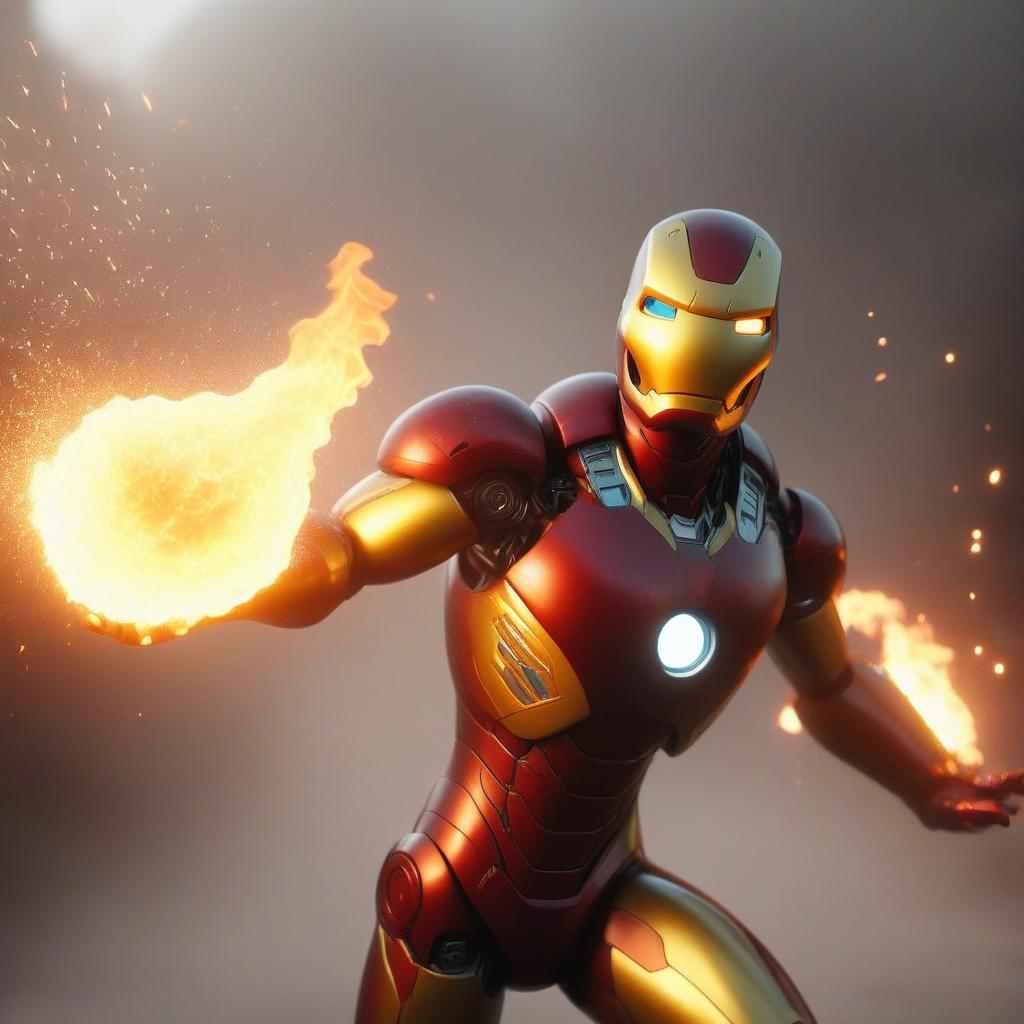

In [4]:
alchemyText = "a ironman real animated with clear "
alchemyText = "a close up of a fire breathing ironman figure, digital art, trending on polycount, real life charmander, sparks flying , photo-realistic unreal engine, ironman in the wild"

result = alchemyapi.invoke_model(alchemyText)
im = Image.open(io.BytesIO(result))
im

In [5]:
alchemyExamples = [
    alchemyText,
    "a mecha robot in a favela",
]

In [6]:
import gradio as gr


def base64_to_pil(img_base64):
    byte_stream = io.BytesIO(img_base64)
    pil_image = Image.open(byte_stream)
    return pil_image


def generate(prompt):
    output = alchemyapi.invoke_model(prompt)
    result_image = base64_to_pil(output)
    return result_image


gr.close_all()
demo = gr.Interface(
    fn=generate,
    inputs=[gr.Textbox(label="Your prompt")],
    outputs=[gr.Image(label="Result")],
    title="Image Generation with Stable Diffusion",
    description="Generate any image with Stable Diffusion",
    allow_flagging="never",
    examples=alchemyExamples,
)

demo.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


### Building a more advanced interface


In [7]:
alchemyExamples = [
    [
        "A beautiful landscape with mountains",
        "a mecha robot in a favela",
        25,  # Inference Steps
        7,  # Guidance Scale
        512,  # Width
        512,  # Height
    ],
    [
        "A cute puppy playing in the park",
        "a dark alley with broken streetlights",
        50,  # Inference Steps
        10,  # Guidance Scale
        256,  # Width
        256,  # Height
    ],
    # Add more examples as needed
]

In [8]:
def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height,
    }

    output = alchemyapi.invoke_model(prompt, params)
    pil_image = base64_to_pil(output)
    return pil_image


demo.close()
gr.close_all()
demo = gr.Interface(
    fn=generate,
    inputs=[
        gr.Textbox(label="Your prompt"),
        gr.Textbox(label="Negative prompt"),
        gr.Slider(
            label="Inference Steps",
            minimum=1,
            maximum=100,
            value=25,
            info="In how many steps will the denoiser denoise the image?",
        ),
        gr.Slider(
            label="Guidance Scale",
            minimum=1,
            maximum=20,
            value=7,
            info="Controls how much the text prompt influences the result",
        ),
        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
    ],
    outputs=[gr.Image(label="Result")],
    title="Image Generation with Stable Diffusion",
    description="Generate any image with Stable Diffusion",
    allow_flagging="never",
    examples=alchemyExamples,
)

demo.launch()

Closing server running on port: 7863
Closing server running on port: 7863
Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [10]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    examples = (alchemyExamples,)
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(
                label="Inference Steps",
                minimum=1,
                maximum=100,
                value=25,
                info="In many steps will the denoiser denoise the image?",
            )
            guidance = gr.Slider(
                label="Guidance Scale",
                minimum=1,
                maximum=20,
                value=7,
                info="Controls how much the text prompt influences the result",
            )
            width = gr.Slider(
                label="Width", minimum=64, maximum=512, step=64, value=512
            )
            height = gr.Slider(
                label="Height", minimum=64, maximum=512, step=64, value=512
            )
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(
        fn=generate,
        inputs=[prompt, negative_prompt, steps, guidance, width, height],
        outputs=[output],
    )
gr.close_all()
demo.launch()

Closing server running on port: 7863
Closing server running on port: 7863
Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


In [ ]:
demo.close()

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt")  # Give prompt some real estate
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit")  # Submit button side by side!
    with gr.Accordion(
        "Advanced options", open=False
    ):  # Let's hide the advanced options!
        negative_prompt = gr.Textbox(label="Negative prompt")
        with gr.Row():
            with gr.Column():
                steps = gr.Slider(
                    label="Inference Steps",
                    minimum=1,
                    maximum=100,
                    value=25,
                    info="In many steps will the denoiser denoise the image?",
                )
                guidance = gr.Slider(
                    label="Guidance Scale",
                    minimum=1,
                    maximum=20,
                    value=7,
                    info="Controls how much the text prompt influences the result",
                )
            with gr.Column():
                width = gr.Slider(
                    label="Width", minimum=64, maximum=512, step=64, value=512
                )
                height = gr.Slider(
                    label="Height", minimum=64, maximum=512, step=64, value=512
                )
    output = gr.Image(label="Result")  # Move the output up too
    btn.click(
        fn=generate,
        inputs=[prompt, negative_prompt, steps, guidance, width, height],
        outputs=[output],
    )

gr.close_all()
# demo.launch()
demo.launch()

In [ ]:
# gr.close_all()
# demo.close()